In [1]:
import numpy as np 
import pandas as pd 
from glob import glob 
import os 
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

#annot_csv=Path("D:/OAK_D_img/oak-d-camera/bbox_package/week4/week4.csv")#D:/00_NCSU/00_Resources/00_Datasets/PartTimePSA/OPENCV/annotations/week4/week4.csv")
#data_dir=Path("D:/OAK_D_img/oak-d-camera/weeks/week4/")
#RGB_IMAGE_SIZE = (1080,1920)
#DEPTH_IMAGE_SIZE = (720,1280)

#annot_cs4v2=Path("D:/OAK_D_img/oak-d-camera/bbox_package/week4/week4_v2.csv")#D:/00_NCSU/00_Resources/00_Datasets/PartTimePSA/OPENCV/annotations/week4/week4.csv")
#annot_cs5v2=Path("D:/OAK_D_img/oak-d-camera/bbox_package/week5/week5_v2.csv")#D:/00_NCSU/00_Resources/00_Datasets/PartTimePSA/OPENCV/annotations/week4/week4.csv")
#annot_cs6v2=Path("D:/OAK_D_img/oak-d-camera/bbox_package/week6/week6_v2.csv")#D:/00_NCSU/00_Resources/00_Datasets/PartTimePSA/OPENCV/annotations/week4/week4.csv")


In [2]:
df1=pd.read_hdf('depth_slices_wk4_v2.h5')
df2=pd.read_hdf('depth_slices_wk5_v2.h5')
df3=pd.read_hdf('depth_slices_wk6_v2.h5')

In [4]:
#df1[['rescaled_sum_exg', 'rescaled_sum_exr', 'rescaled_sum_ndi', 'rescaled_sum_exgminexr', 'rescaled_area']] = df1_v2[['rescaled_sum_exg', 'rescaled_sum_exr', 'rescaled_sum_ndi', 'rescaled_sum_exgminexr', 'rescaled_area']]
#df2[['rescaled_sum_exg', 'rescaled_sum_exr', 'rescaled_sum_ndi', 'rescaled_sum_exgminexr', 'rescaled_area']] = df2_v2[['rescaled_sum_exg', 'rescaled_sum_exr', 'rescaled_sum_ndi', 'rescaled_sum_exgminexr', 'rescaled_area']]  
#df3[['rescaled_sum_exg', 'rescaled_sum_exr', 'rescaled_sum_ndi', 'rescaled_sum_exgminexr', 'rescaled_area']] = df3_v2[['rescaled_sum_exg', 'rescaled_sum_exr', 'rescaled_sum_ndi', 'rescaled_sum_exgminexr', 'rescaled_area']]  

In [5]:
result = df1.append(df2, ignore_index=True)
result2 = result.append(df3, ignore_index=True)

In [6]:
result2.head()

,date,time,week,row,stop,image,speciesid,commonname,annotation_file,mask_dir,...,histograms_map,origin,exg,exr,ndi,exg-exr,area,stats,Biomass,pot
0,20210415,153241,wk4,row9,stop16,wk4_row9_stop16_20210415_153241_rgb.png,5.0,grass,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"([195142, 1719, 1690, 1750, 2431, 2020, 2413, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[874459.0, 7.635462689694917, 25.4940957733491...",0.511,NaN
1,20210414,101652,wk4,row1,stop1,wk4_row1_stop1_20210414_101652_rgb.png,0.0,clover,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"([25315, 790, 692, 670, 650, 655, 772, 759, 10...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[491204.0, 24.008015640273705, 56.755251622875...",0.051,NaN
2,20210415,152931,wk4,row9,stop12,wk4_row9_stop12_20210415_152931_rgb.png,5.0,grass,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"([171728, 1791, 2302, 2056, 3113, 2074, 2466, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1063644.0, 9.830442055841552, 27.480919694138...",0.390,NaN
3,20210415,150825,wk4,row8,stop9,wk4_row8_stop9_20210415_150825_rgb.png,1.0,sunflower,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"([100736, 697, 647, 639, 820, 803, 985, 692, 9...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[4023699.0, 54.03476801181763, 57.633987649702...",0.564,NaN
4,20210414,124844,wk4,row7,stop6,wk4_row7_stop6_20210414_124844_rgb.png,2.0,cowpea,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"([210032, 1195, 1130, 1051, 1367, 1078, 1311, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[8151830.0, 54.35096843017635, 65.139187269907...",0.696,NaN


In [7]:
print(result2['histograms'])

0      ([15826, 460, 490, 518, 589, 662, 684, 834, 89...
1      ([4056, 96, 79, 86, 108, 89, 111, 136, 182, 30...
2      ([16516, 451, 453, 519, 598, 706, 762, 809, 95...
3      ([7501, 245, 310, 323, 343, 375, 471, 1104, 27...
4      ([14878, 497, 484, 470, 614, 667, 1222, 47456,...
                             ...                        
156    ([38128, 1157, 1325, 1630, 6802, 5755, 4574, 1...
157    ([33447, 791, 869, 1017, 3531, 6675, 2432, 192...
158    ([23777, 626, 651, 780, 1214, 2107, 7196, 3525...
159    ([29963, 772, 842, 1048, 1091, 2656, 3800, 346...
160    ([20338, 752, 848, 895, 2181, 5189, 3133, 7449...
Name: histograms, Length: 161, dtype: object


In [8]:
result2.sort_values('speciesid')

,date,time,week,row,stop,image,speciesid,commonname,annotation_file,mask_dir,...,histograms_map,origin,exg,exr,ndi,exg-exr,area,stats,Biomass,pot
58,20210421,95740,wk5,row2,stop5,wk5_row2_stop5_20210421_095740_rgb.png,0.0,clover,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,...,"([29197, 194, 171, 150, 182, 177, 294, 328, 10...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1321281.0, 50.26175441265977, 71.643611405553...",0.527,2.0
67,20210421,105134,wk5,row4,stop1,wk5_row4_stop1_20210421_105134_rgb.png,0.0,clover,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,...,"([28922, 110, 94, 126, 135, 141, 158, 187, 502...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[849557.0, 30.53214734950584, 55.9810305100772...",NaN,1.0
66,20210421,103213,wk5,row3,stop17,wk5_row3_stop17_20210421_103213_rgb.png,0.0,clover,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,...,"([37026, 126, 123, 103, 101, 81, 77, 107, 81, ...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1318672.0, 40.003397645916756, 64.79960138291...",0.156,5.0
65,20210421,102707,wk5,row3,stop13,wk5_row3_stop13_20210421_102707_rgb.png,0.0,clover,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,...,"([24918, 92, 82, 105, 110, 114, 122, 130, 218,...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1390481.0, 57.47689318783068, 72.862004761745...",0.174,4.0
64,20210421,102306,wk5,row3,stop9,wk5_row3_stop9_20210421_102306_rgb.png,0.0,clover,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week5\w...,...,"([20391, 79, 85, 86, 75, 88, 100, 102, 123, 16...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[350401.0, 18.114195616211745, 48.948018725086...",0.296,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,20210428,112154,wk6,row6,stop17,wk6_row6_stop17_20210428_112154_rgb.png,6.0,velvetleaf,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week6\w...,...,"([237806, 914, 679, 372, 364, 332, 314, 278, 2...","[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[9309738.0, 52.513723897519206, 57.73031430362...",1.532,5.0
90,20210422,105049,wk5,row8,stop17,wk5_row8_stop17_20210422_105049_rgb.png

(array([2.19230769, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.46153846, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.34615385, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.69230769, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.23076923,
        0.        , 0.        , 0.        , 0.        , 2.07692308]),
 array([0.        , 0.16666667, 0.33333333, 0.5       , 0.66666667,
        0.83333333, 1.        , 1.16666667, 1.33333333, 1.5       ,
        1.66666667, 1.83333333, 2.        , 2.16666667, 2.33333333,
        2.5       , 2.66666667, 2.83333333, 3.        , 3.16666667,
        3.33333333, 3.5       , 3.66666667, 3.83333333, 4.        ,
        4.16666667, 4.33333333, 4.5       , 4.66666667, 4.83333333,
        5.        ]),
 <BarContainer object of 30 artists>)

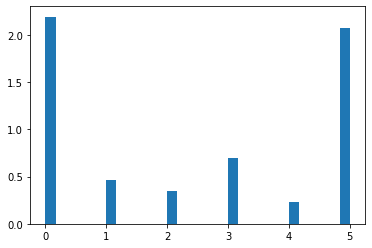

In [9]:
%matplotlib inline
plt.hist(df1['speciesid'], density=True, bins=30)
#hist = result2['speciesid'].hist()
#plt.savefig("pandas_hist_01.png", bbox_inches='tight', dpi=100)

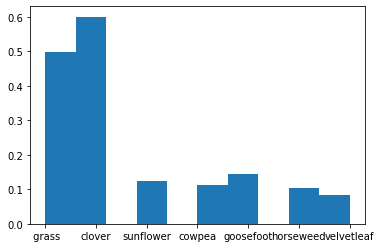

In [10]:
plt.hist(result2['commonname'], density=True)

#hist = result2['commonname'].hist()
plt.savefig("pandas_hist_01.png", bbox_inches='tight', dpi=100)

In [11]:
print(result2['histograms'])

0      ([15826, 460, 490, 518, 589, 662, 684, 834, 89...
1      ([4056, 96, 79, 86, 108, 89, 111, 136, 182, 30...
2      ([16516, 451, 453, 519, 598, 706, 762, 809, 95...
3      ([7501, 245, 310, 323, 343, 375, 471, 1104, 27...
4      ([14878, 497, 484, 470, 614, 667, 1222, 47456,...
                             ...                        
156    ([38128, 1157, 1325, 1630, 6802, 5755, 4574, 1...
157    ([33447, 791, 869, 1017, 3531, 6675, 2432, 192...
158    ([23777, 626, 651, 780, 1214, 2107, 7196, 3525...
159    ([29963, 772, 842, 1048, 1091, 2656, 3800, 346...
160    ([20338, 752, 848, 895, 2181, 5189, 3133, 7449...
Name: histograms, Length: 161, dtype: object


In [12]:
from sklearn.decomposition import PCA

In [13]:
result3=result2

In [14]:
result3["commonname"].replace({"sunflower": "broadleaf", "cowpea": "broadleaf", "horseweed": "broadleaf", "goosefoot": "broadleaf", "velvetleaf": "broadleaf"}, inplace=True)

In [15]:
result3["commonname"].replace({" grass": "grass"}, inplace=True)

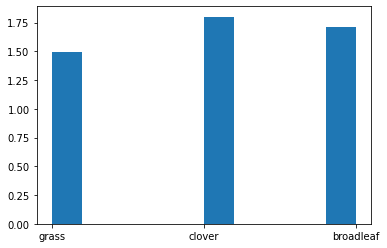

In [16]:
plt.hist(result2['commonname'], density=True)

#hist = result2['commonname'].hist()
plt.savefig("pandas_hist_02.png", bbox_inches='tight', dpi=100)

In [17]:
def get_frequencies(x):
    return x['histograms'][0]
freqs=result3.apply(get_frequencies,axis=1)

def get_bins(x):
    return x['histograms'][1]
bins=result3.apply(get_bins,axis=1)

In [18]:
print(freqs)

0      [15826, 460, 490, 518, 589, 662, 684, 834, 896...
1      [4056, 96, 79, 86, 108, 89, 111, 136, 182, 304...
2      [16516, 451, 453, 519, 598, 706, 762, 809, 959...
3      [7501, 245, 310, 323, 343, 375, 471, 1104, 270...
4      [14878, 497, 484, 470, 614, 667, 1222, 47456, ...
                             ...                        
156    [38128, 1157, 1325, 1630, 6802, 5755, 4574, 10...
157    [33447, 791, 869, 1017, 3531, 6675, 2432, 1928...
158    [23777, 626, 651, 780, 1214, 2107, 7196, 3525,...
159    [29963, 772, 842, 1048, 1091, 2656, 3800, 3466...
160    [20338, 752, 848, 895, 2181, 5189, 3133, 7449,...
Length: 161, dtype: object


In [19]:
print(bins)

0      [0, 50, 100, 150, 200, 250, 300, 350, 400, 450...
1      [0, 50, 100, 150, 200, 250, 300, 350, 400, 450...
2      [0, 50, 100, 150, 200, 250, 300, 350, 400, 450...
3      [0, 50, 100, 150, 200, 250, 300, 350, 400, 450...
4      [0, 50, 100, 150, 200, 250, 300, 350, 400, 450...
                             ...                        
156    [0, 50, 100, 150, 200, 250, 300, 350, 400, 450...
157    [0, 50, 100, 150, 200, 250, 300, 350, 400, 450...
158    [0, 50, 100, 150, 200, 250, 300, 350, 400, 450...
159    [0, 50, 100, 150, 200, 250, 300, 350, 400, 450...
160    [0, 50, 100, 150, 200, 250, 300, 350, 400, 450...
Length: 161, dtype: object


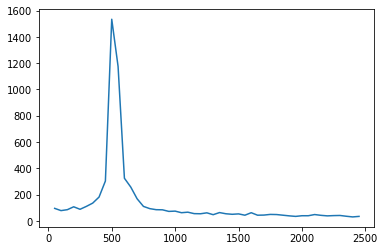

In [20]:
plt.plot(bins[1][1:50], freqs[1][1:50])
#plt.plot(np.delete(bins[1], -1), freqs[1])
plt.show()

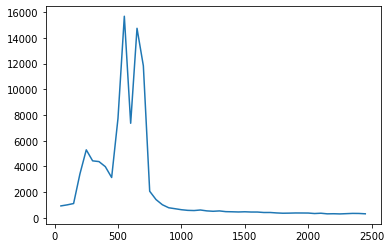

In [21]:
plt.plot(bins[100][1:50], freqs[100][1:50])
#plt.plot(np.delete(bins[1], -1), freqs[1])
plt.show()

In [22]:
result3['frequency']=freqs

In [23]:
result3['bins']=bins

In [24]:
print(type(freqs))

<class 'pandas.core.series.Series'>


In [25]:
result3.head()

,date,time,week,row,stop,image,speciesid,commonname,annotation_file,mask_dir,...,exg,exr,ndi,exg-exr,area,stats,Biomass,pot,frequency,bins
0,20210415,153241,wk4,row9,stop16,wk4_row9_stop16_20210415_153241_rgb.png,5.0,grass,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[874459.0, 7.635462689694917, 25.4940957733491...",0.511,NaN,"[15826, 460, 490, 518, 589, 662, 684, 834, 896...","[0, 50, 100, 150, 200, 250, 300, 350, 400, 450..."
1,20210414,101652,wk4,row1,stop1,wk4_row1_stop1_20210414_101652_rgb.png,0.0,clover,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[491204.0, 24.008015640273705, 56.755251622875...",0.051,NaN,"[4056, 96, 79, 86, 108, 89, 111, 136, 182, 304...","[0, 50, 100, 150, 200, 250, 300, 350, 400, 450..."
2,20210415,152931,wk4,row9,stop12,wk4_row9_stop12_20210415_152931_rgb.png,5.0,grass,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1063644.0, 9.830442055841552, 27.480919694138...",0.390,NaN,"[16516, 451, 453, 519, 598, 706, 762, 809, 959...","[0, 50, 100, 150, 200, 250, 300, 350, 400, 450..."
3,20210415,150825,wk4,row8,stop9,wk4_row8_stop9_20210415_150825_rgb.png,1.0,broadleaf,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[4023699.0, 54.03476801181763, 57.633987649702...",0.564,NaN,"[7501, 245, 310, 323, 343, 375, 471, 1104, 270...","[0, 50, 100, 150, 200, 250, 300, 350, 400, 450..."
4,20210414,124844,wk4,row7,stop6,wk4_row7_stop6_20210414_124844_rgb.png,2.0,broadleaf,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,D:\OAK_D_img\oak-d-camera\bbox_package\week4\w...,...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[8151830.0, 54.35096843017635, 65.139187269907...",0.696,NaN,"[14878, 497, 484, 470, 614, 667, 1222, 47456, ...","[0, 50, 100, 150, 200, 250, 300, 350, 400, 450..."


In [26]:
result3.to_hdf('complete_h5_v2.h5', key='df')

d:\intel\openvino_notebooks\openvino_env\lib\site-packages\pandas\core\generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['week', 'row', 'stop', 'image', 'commonname', 'annotation_file',
       'mask_dir', 'image_file', 'image_dir', 'depth_dir', 'disp_map_dir',
       'annotations', 'depth_slices', 'mask', 'disp_maps', 'histograms',
       'histograms_map', 'origin', 'exg', 'exr', 'ndi', 'exg-exr', 'area',
       'stats', 'frequency', 'bins'],
      dtype='object')]

  encoding=encoding,


In [85]:
print(type(result3['frequency']))

<class 'pandas.core.series.Series'>
